In [1]:
import os
import time
import inspect

import tensorflow as tf
import numpy as np
from scipy.io import loadmat

import skimage
import skimage.io
import skimage.transform

import warnings
warnings.filterwarnings('ignore')

import vggFace2

import scipy
import matplotlib.pyplot as plt
plt.ion()

In [2]:
def load_image(path):
    # load image
    img = skimage.io.imread(path)
    # print "Original Image Shape: ", img.shape
    # we crop image from center
    short_edge = min(img.shape[:2])
    yy = int((img.shape[0] - short_edge) / 2)
    xx = int((img.shape[1] - short_edge) / 2)
    crop_img = img[yy: yy + short_edge, xx: xx + short_edge]
    # resize to 224, 224
    resized_img = skimage.transform.resize(crop_img, (128, 128))
    return resized_img

In [3]:
img1 = load_image("./data/61237.jpg")
img1 = img1.reshape((1, 128, 128, 3))

# img2 = load_image("./data/62607.jpg")
# img2 = img2.reshape((1, 128, 128, 3))

# batch = np.concatenate((img1, img2), 0)

In [4]:
with tf.Session() as sess:
    image = tf.placeholder("float", [1, 128, 128, 3])
    feed_dict = {image: img1}
    
    vggFace2 = vggFace2.VggFace2()
    vggFace2_out = vggFace2.build(image, 'conv2_2_relu')
    out = sess.run(vggFace2_out, feed_dict=feed_dict)

/Users/user/Desktop/FastFaceSwapStyleLoss/./matconvnet/senet/senet50_ft-dag.mat
mat file loading...
make data_dict...
make layer info...
build model started...
build model finished: 0s


In [7]:
with tf.Session() as sess:
    image = tf.placeholder("float", [1, 128, 128, 3])
    feed_dict = {image: img1}
    
    vggFace2_out = vggFace2.build(image, 'conv2_2_relu')
    out = sess.run(vggFace2_out, feed_dict=feed_dict)

build model started...
build model finished: 0s


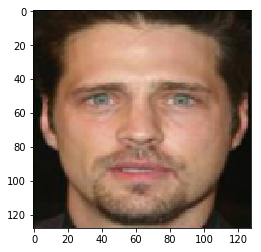

In [5]:
plt.imshow(np.squeeze(img1))

In [6]:
out_for_print = out + np.array([131.0912,  103.8827,   91.4953])
out_for_print = out_for_print/255.0

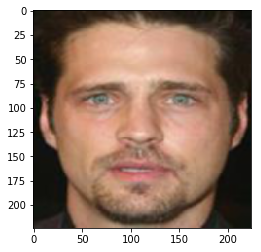

In [7]:
plt.imshow(scipy.misc.toimage(np.squeeze(out_for_print)))

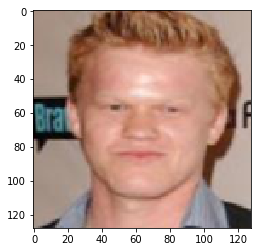

In [28]:
plt.imshow(scipy.misc.toimage(np.squeeze(img1)))